In [1]:
%%capture
!pip install datasets

In [2]:
# !git clone https://github.com/201528014227051/RSICD_optimal

In [3]:
# !ls RSICD_optimal/

The RSCID dataset is shared by the authors on [gdrive](https://drive.google.com/open?id=0B1jt7lJDEXy3aE90cG9YSl9ScUk). To access it one can go to "Shared with me" section and add shortcut to your drive. 

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [5]:
from pathlib import Path

In [6]:
path = Path(root_dir + 'RSICD/')

In [7]:
!ls /content/gdrive/MyDrive/RSICD/

annotations_rsicd.rar  dataset_rsicd.json  readme.txt
annotations_RSICD.rar  README.md	   RSICD_images.rar


In [8]:
import json

with open(path/"dataset_rsicd.json") as f:
    ds = json.load(f)

In [9]:
ds.keys()

dict_keys(['images', 'dataset'])

In [10]:
type(ds['images'])

list

In [11]:
from datasets import Dataset, DatasetDict

In [12]:
ds1 = Dataset.from_json(path.as_posix()+'/dataset_rsicd.json', field='images')
sample = ds1[0]

Using custom data configuration default-761c752d06825144


Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-761c752d06825144/0.0.0. Subsequent calls will reuse this data.


In [13]:
sample.keys()

dict_keys(['filename', 'imgid', 'sentences', 'split', 'sentids'])

In [14]:
for k, v in sample.items():
    print(k, type(v))

filename <class 'str'>
imgid <class 'int'>
sentences <class 'list'>
split <class 'str'>
sentids <class 'list'>


In [15]:
len(ds1['filename'])

10921

In [16]:
set(ds1['split'])

{'test', 'train', 'val'}

In [17]:
ds1['sentences'][:2]

[[{'imgid': 0,
   'raw': 'many planes are parked next to a long building in an airport .',
   'sentid': 0,
   'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport']},
  {'imgid': 0,
   'raw': 'many planes are parked next to a long building in an airport .',
   'sentid': 1,
   'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport']},
  {'imgid': 0,
   'raw': 'many planes are parked next to a long building in an airport .',
   'sentid': 2,
   'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport']},
  {'imgid': 0,
   'raw': 'many planes are parked next to a long building in an airport .',
   'sentid': 3,
   'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long

In [18]:
for x in ds1['sentids']:
    assert len(x) == 5

In [19]:
%%capture
!unrar x gdrive/MyDrive/RSICD/RSICD_images.rar

In [20]:
!ls -U RSICD_images/ | head -10

stadium_171.jpg
parking_55.jpg
square_179.jpg
bareland_180.jpg
00415.jpg
center_208.jpg
mountain_34.jpg
park_301.jpg
mountain_238.jpg
baseballfield_32.jpg


In [21]:
# from datasets.download_manager import *

In [22]:
with open('/content/RSICD_images/stadium_1.jpg', 'rb') as f:
    bimg = f.read()
bimg

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xed9vPhotoshop 3.0\x008BIM\x04%\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x008BIM\x04:\x00\x00\x00\x00\x00\xd7\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x0bprintOutput\x00\x00\x00\x05\x00\x00\x00\x00PstSbool\x01\x00\x00\x00\x00Inteenum\x00\x00\x00\x00Inte\x00\x00\x00\x00Img \x00\x00\x00\x0fprintSixteenBitbool\x00\x00\x00\x00\x0bprinterNameTEXT\x00\x00\x00\x01\x00\x00\x00\x00\x00\x0fprintProofSetupObjc\x00\x00\x00\x05h!h7\x8b\xbe\x7fn\x00\x00\x00\x00\x00\nproofSetup\x00\x00\x00\x01\x00\x00\x00\x00Bltnenum\x00\x00\x00\x0cbuiltinProof\x00\x00\x00\tproofCMYK\x008BIM\x04;\x00\x00\x00\x00\x02-\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x12printOutputOptions\x00\x00\x00\x17\x00\x00\x00\x00Cptnbool\x00\x00\x00\x00\x00Clbrbool\x00\x00\x00\x00\x00RgsMbool\x00\x00\x00\x00\x00CrnCbool\x00\x00\x00\x00\x00CntCbool\x00\x00\x00\x00\x00Lblsbool\x00\x00\x00\x00\x00Ngtvbool\x0

In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

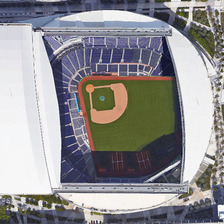

In [24]:
img = Image.open('/content/RSICD_images/stadium_1.jpg')
img

In [25]:
img = np.asarray(Image.open('/content/RSICD_images/stadium_1.jpg'))

In [26]:
img.shape

(224, 224, 3)

In [27]:
def read_image(filename):
    return np.asarray(Image.open(filename))

In [28]:
def add_images(example):
    return {'image':read_image(f"/content/RSICD_images/{example['filename']}")}

In [58]:
import datasets

In [60]:
ds1s = ds1.select(list(range(100)))

In [69]:
features = ds1s.features.copy()
features["image"] = datasets.Array3D(shape=(224, 224, 3), dtype="uint8")

In [67]:
features = datasets.Features({"image": datasets.Array3D(shape=(224, 224, 3), dtype="uint8")})

In [70]:
ds3 = ds1s.map(add_images, features=features)

In [71]:
ds3.features

{'filename': Value(dtype='string', id=None),
 'image': Array3D(shape=(224, 224, 3), dtype='uint8', id=None),
 'imgid': Value(dtype='int64', id=None),
 'sentences': [{'imgid': Value(dtype='int64', id=None),
   'raw': Value(dtype='string', id=None),
   'sentid': Value(dtype='int64', id=None),
   'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}],
 'sentids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'split': Value(dtype='string', id=None)}

In [ ]:
ds2 = ds1.map(add_images)

In [31]:
ds2.features

{'filename': Value(dtype='string', id=None),
 'image': Sequence(feature=Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None), length=-1, id=None),
 'imgid': Value(dtype='int64', id=None),
 'sentences': [{'imgid': Value(dtype='int64', id=None),
   'raw': Value(dtype='string', id=None),
   'sentid': Value(dtype='int64', id=None),
   'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}],
 'sentids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'split': Value(dtype='string', id=None)}

In [ ]:
def show_example(e):
    id = random.randint(0, len(ds2))
    e = ds2[id]

    img = e["image"]
    plt.imshow(img)
    sid = random.randint(0,5)
    plt.title(e['sentences'][sid]['raw'])
    plt.show()

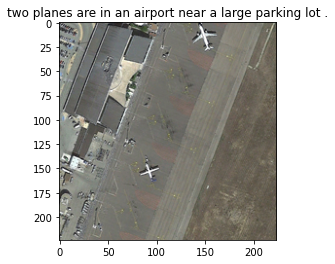

In [72]:
import random

id = random.randint(0, len(ds3)-1)
e = ds3[id]

img = e["image"]
plt.imshow(img)
sid = random.randint(0,4)
plt.title(e['sentences'][sid]['raw'])
plt.show()

In [73]:
ds3.filter??

### cifar10 ref

In [36]:
from datasets import load_dataset

In [38]:
cifar10 = load_dataset('cifar10', split='test')

Reusing dataset cifar10 (/root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/951e017399fa3b30edfca56468a91ac6a03c9167c0b3f79367e777d1f9a0cf7e)


In [39]:
cifar10.features

{'img': Array3D(shape=(32, 32, 3), dtype='uint8', id=None),
 'label': ClassLabel(num_classes=10, names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], names_file=None, id=None)}

In [41]:
type(cifar10[0]['img'])

list

## UCM

In [ ]:
# !wget 

In [ ]:
import json

with open('/content/ucm_dataset.json') as f:
    ds = json.load(f)

JSONDecodeError: ignored